In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore') # warnings 무시
%matplotlib inline

In [2]:
test_df = pd.read_csv('./DATA/test.csv')
train_df = pd.read_csv('./DATA/train.csv')

In [3]:
test_df

,ID,ADDRESS,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,18510,29 Hartung Street,Mundaring,3,2,3.0,2199,159,1950.0,29600,Midland Station,15600,03-2019\r,6073,-31.899705,116.166117,MUNDARING CHRISTIAN COLLEGE,1.341198,NaN
1,18511,6 Kirkby Ridge,Salter Point,4,3,2.0,509,341,2001.0,8200,Canning Bridge Station,2000,08-2017\r,6152,-32.018620,115.858900,AQUINAS COLLEGE,0.882405,23.0
2,18512,45 Connelly Way,Booragoon,4,3,2.0,725,251,1982.0,10500,Bull Creek Station,2700,07-2018\r,6154,-32.042090,115.826290,APPLECROSS SENIOR HIGH SCHOOL,1.639635,34.0
3,18513,21 Torrenova Way,Sinagra,3,2,2.0,401,169,2009.0,24100,Joondalup Station,3500,05-2014\r,6065,-31.740480,115.804078,WANNEROO SECONDARY COLLEGE,2.199511,131.0
4,18514,4B Hilo Place,Warnbro,3,1,1.0,474,107,1993.0,43600,Warnbro Station,1100,03-2019\r,6169,-32.335790,115.765140,WARNBRO COMMUNITY HIGH SCHOOL,1.227092,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,33651,2 Danehill Place,Balga,3,1,NaN,801,108,1996.0,10800,Warwick Station,3900,04-2018\r,6061,-31.857800,115.834370,BALGA SENIOR HIGH SCHOOL,1.352896,NaN
15142,33652,19 Hester Street,Langford,4,2,2.0,530,158,1998.0,13100,Thornlie Station,854,11-2018\r,6147,-32.039400,115.951670,COMMUNICARE ACADEMY,1.526169,NaN
15143,33653,43 Hale Street,Watermans Bay,3,2,2.0,1072,148,1950.0,14700,Warwick Station,3800,02-2015\r,6020,-31.852980,115.757010,CARINE SENIOR HIGH SCHOOL,1.779797,47.0
15144,33654,980 Bushlands Road,Hovea,5,3,2.0,19996,396,1990.0,24900,Midland Station,10200,09-2012\r,6071,-31.878930,116.107640,HELENA COLLEGE,3.523922,78.0


In [4]:
train_df

,ID,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,9 Crumlin Way,Ridgewood,520000,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,1,37 Sissinghurst Crescent,Landsdale,575000,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN
2,2,24 Tees Court,Mindarie,760000,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,3,31 Brentham Street,Mount Hawthorn,1230000,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,4,46/1 Corkhill Street,North Fremantle,2010000,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,18505,36 Kentucky Boulevard,Hocking,475000,4,2,2.0,533,198,2007.0,21200,Edgewater Station,4400,04-2018\r,6065,-31.764187,115.824151,WANNEROO SECONDARY COLLEGE,1.104533,131.0
18506,18506,10 Regatta Boulevard,Champion Lakes,485000,3,2,2.0,344,237,2010.0,22100,Kelmscott Station,1900,06-2011\r,6111,-32.114990,115.992834,JOHN WOLLASTON ANGLICAN COMMUNITY SCHOOL,1.816768,40.0
18507,18507,145 Coolgardie Avenue,Redcliffe,642000,3,1,1.0,1016,110,1953.0,8900,Bassendean Station,3100,01-2018\r,6104,-31.931320,115.950060,CYRIL JACKSON SENIOR CAMPUS,2.169696,NaN
18508,18508,12 Mckenzie Road,Samson,491000,4,2,2.0,718,176,1988.0,14600,Murdoch Station,5400,03-2009\r,6163,-32.070861,115.793834,SETON CATHOLIC COLLEGE,0.208669,91.0


In [5]:
print(train_df.shape, test_df.shape)

(18510, 20) (15146, 19)


In [6]:
train_ID = train_df['ID']
test_ID = test_df['ID']

In [7]:
train_df.drop('ID', axis=1, inplace=True)
test_df.drop('ID', axis=1, inplace=True)

In [8]:
# fig, ax = plt.subplots()

# ax.scatter(x=train_df['ADDRESS'], y=train_df['PRICE'])
# plt.ylabel('PRICE', fontsize=13)
# plt.xlabel('ADDRESS', fontsize=13)
# plt.show()

634772.6629929767 352867.53159875056


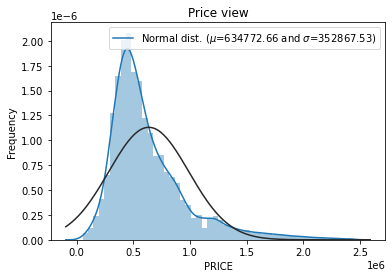

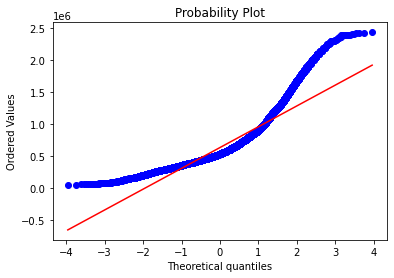

In [9]:
sns.distplot(train_df['PRICE'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['PRICE'])
print(mu, sigma)

# 분포를 그래프에 그려봅시다
plt.legend(['Normal dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Price view')

fig = plt.figure()
res = stats.probplot(train_df['PRICE'], plot=plt)
plt.show()

In [10]:
train_df['PRICE'] = np.log1p(train_df['PRICE'])

13.230743895743833 0.5070898554879973


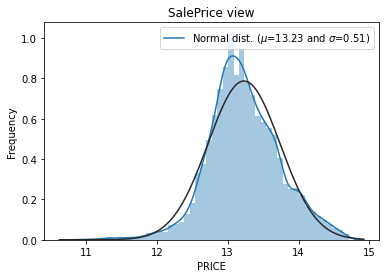

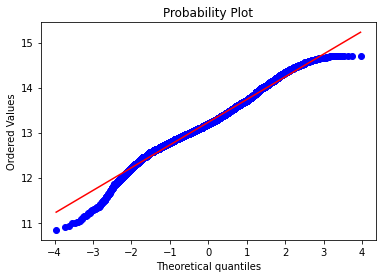

In [11]:
sns.distplot(train_df['PRICE'], fit=norm)
(mu, sigma) = norm.fit(train_df['PRICE'])
print(mu, sigma)
plt.legend(['Normal dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice view')
fig = plt.figure()
res = stats.probplot(train_df['PRICE'], plot=plt)
plt.show()

In [12]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]

price = train_df.PRICE.values

all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['PRICE'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (33656, 18)


In [13]:
all_data_nan = (all_data.isnull().sum() / len(all_data)) * 100
all_data_nan

ADDRESS              0.000000
SUBURB               0.000000
BEDROOMS             0.000000
BATHROOMS            0.000000
GARAGE               7.362729
LAND_AREA            0.000000
FLOOR_AREA           0.000000
BUILD_YEAR           9.374257
CBD_DIST             0.000000
NEAREST_STN          0.000000
NEAREST_STN_DIST     0.000000
DATE_SOLD            0.000000
POSTCODE             0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
NEAREST_SCH          0.000000
NEAREST_SCH_DIST     0.000000
NEAREST_SCH_RANK    32.541003
dtype: float64

In [14]:
all_data_nan = all_data_nan.drop(all_data_nan[all_data_nan == 0].index).sort_values(ascending=False)[:30]
all_data_nan

NEAREST_SCH_RANK    32.541003
BUILD_YEAR           9.374257
GARAGE               7.362729
dtype: float64

In [15]:
missing_data = pd.DataFrame({"Missing Ratio" : all_data_nan})
missing_data.head(20)

,Missing Ratio
NEAREST_SCH_RANK,32.541003
BUILD_YEAR,9.374257
GARAGE,7.362729


Text(0.5, 1.0, 'Percent missing data by feature')

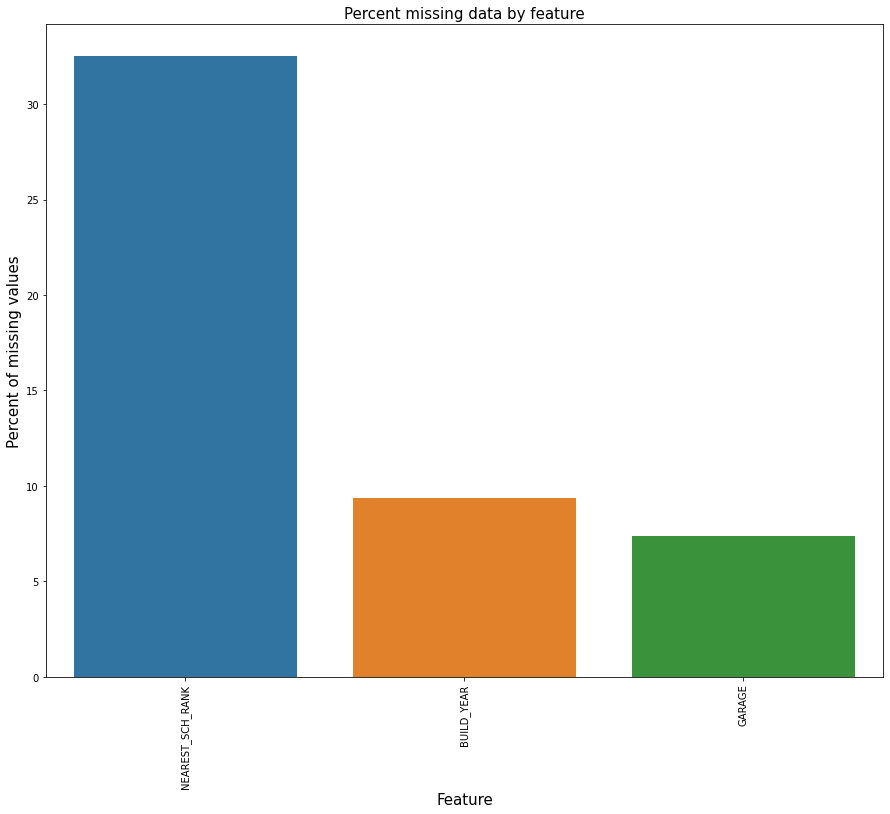

In [16]:
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_nan.index, y=all_data_nan)
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<AxesSubplot:>

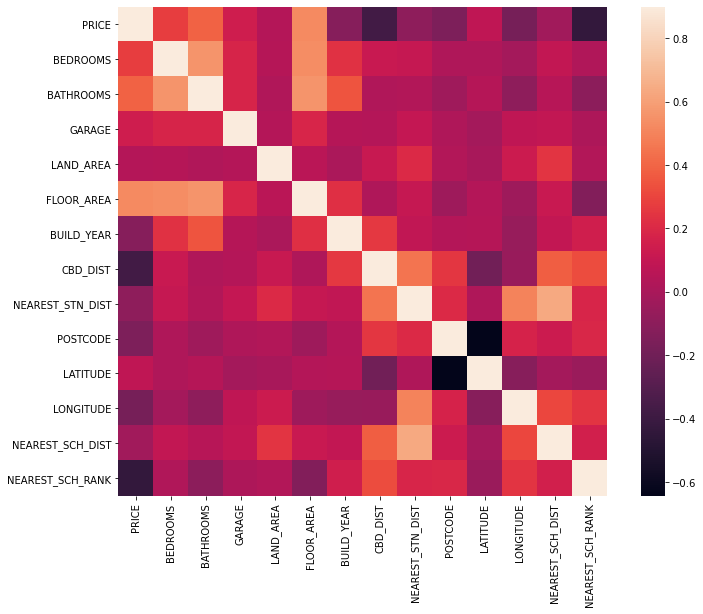

In [17]:
corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

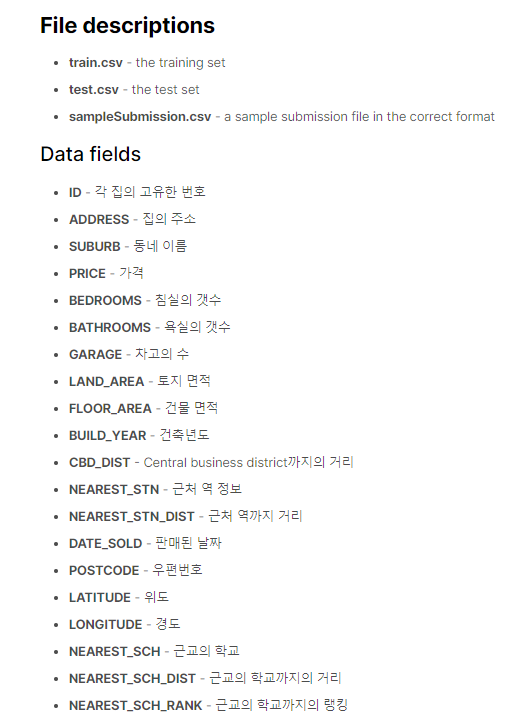

In [18]:
train_df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,9 Crumlin Way,Ridgewood,13.161586,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,37 Sissinghurst Crescent,Landsdale,13.262127,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN
2,24 Tees Court,Mindarie,13.541075,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,31 Brentham Street,Mount Hawthorn,14.022526,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,46/1 Corkhill Street,North Fremantle,14.513646,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,36 Kentucky Boulevard,Hocking,13.071072,4,2,2.0,533,198,2007.0,21200,Edgewater Station,4400,04-2018\r,6065,-31.764187,115.824151,WANNEROO SECONDARY COLLEGE,1.104533,131.0
18506,10 Regatta Boulevard,Champion Lakes,13.091906,3,2,2.0,344,237,2010.0,22100,Kelmscott Station,1900,06-2011\r,6111,-32.114990,115.992834,JOHN WOLLASTON ANGLICAN COMMUNITY SCHOOL,1.816768,40.0
18507,145 Coolgardie Avenue,Redcliffe,13.372345,3,1,1.0,1016,110,1953.0,8900,Bassendean Station,3100,01-2018\r,6104,-31.931320,115.950060,CYRIL JACKSON SENIOR CAMPUS,2.169696,NaN
18508,12 Mckenzie Road,Samson,13.104201,4,2,2.0,718,176,1988.0,14600,Murdoch Station,5400,03-2009\r,6163,-32.070861,115.793834,SETON CATHOLIC COLLEGE,0.208669,91.0


NEAREST_SCH_RANK 32.541003 = 학교까지 랭킹

BUILD_YEAR 9.374257 = 건축년도

GARAGE 7.362729 = 차고의 수

# 결측치 채우기

In [19]:
all_data["NEAREST_SCH_RANK"].describe()

count    22704.000000
mean        72.672569
std         40.639795
min          1.000000
25%         39.000000
50%         68.000000
75%        105.000000
max        139.000000
Name: NEAREST_SCH_RANK, dtype: float64

In [20]:
all_data["NEAREST_SCH_RANK"] = all_data["NEAREST_SCH_RANK"].fillna(140)

In [21]:
all_data["NEAREST_SCH_RANK"].isnull().sum()

0

In [22]:
all_data["BUILD_YEAR"] = all_data["BUILD_YEAR"].fillna(all_data["BUILD_YEAR"].mode()[0])

In [23]:
all_data["BUILD_YEAR"].isnull().sum()

0

In [24]:
all_data["BUILD_YEAR"].mode()

0    2000.0
dtype: float64

In [25]:
all_data["BUILD_YEAR"].head(80)

0     2007.0
1     2014.0
2     1992.0
3     1938.0
4     2004.0
       ...  
75    1999.0
76    2012.0
77    2000.0
78    2005.0
79    2001.0
Name: BUILD_YEAR, Length: 80, dtype: float64

In [26]:
all_data["GARAGE"] = all_data["GARAGE"].fillna(all_data["GARAGE"].mode()[0])
all_data["GARAGE"].isnull().sum()

0

In [27]:
all_data

,ADDRESS,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,9 Crumlin Way,Ridgewood,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,37 Sissinghurst Crescent,Landsdale,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,140.0
2,24 Tees Court,Mindarie,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,31 Brentham Street,Mount Hawthorn,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,46/1 Corkhill Street,North Fremantle,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,2 Danehill Place,Balga,3,1,2.0,801,108,1996.0,10800,Warwick Station,3900,04-2018\r,6061,-31.857800,115.834370,BALGA SENIOR HIGH SCHOOL,1.352896,140.0
33652,19 Hester Street,Langford,4,2,2.0,530,158,1998.0,13100,Thornlie Station,854,11-2018\r,6147,-32.039400,115.951670,COMMUNICARE ACADEMY,1.526169,140.0
33653,43 Hale Street,Watermans Bay,3,2,2.0,1072,148,1950.0,14700,Warwick Station,3800,02-2015\r,6020,-31.852980,115.757010,CARINE SENIOR HIGH SCHOOL,1.779797,47.0
33654,980 Bushlands Road,Hovea,5,3,2.0,19996,396,1990.0,24900,Midland Station,10200,09-2012\r,6071,-31.878930,116.107640,HELENA COLLEGE,3.523922,78.0


# 어드레스에서 숫자를 지워버리면 스트릿 이름으로다가 범주형 데이터가 될수 있지 않을까?? 부자거리 슬럼거리 있으니까 그걸로 좋을듯

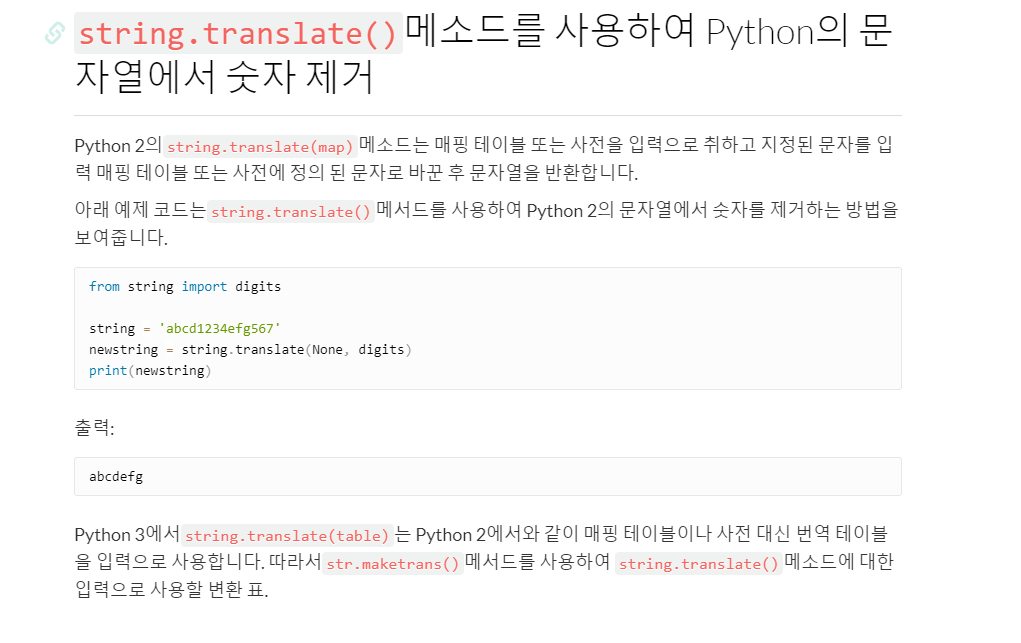

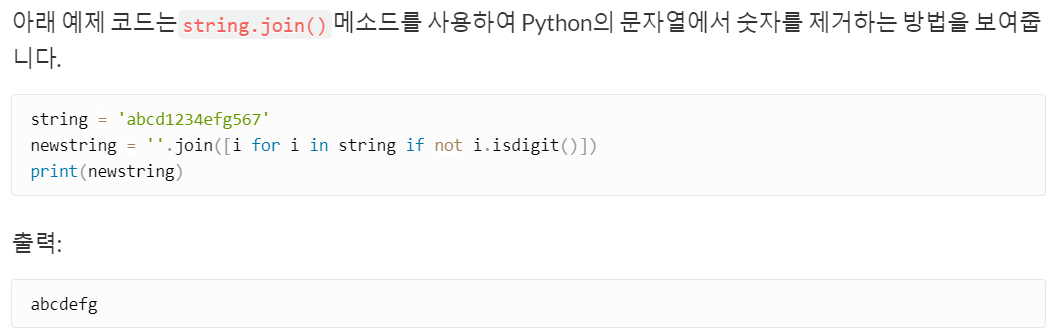

In [28]:
import re

cng = all_data['ADDRESS']
# cng[0] =re.sub(r"[^a-zA-Z]", "", cng[0])
# all_data['ADDRESS'][0]

In [29]:
def onlyStr(a):
    return re.sub(r"[^a-zA-Z]", "", a)

# cng = all_data['ADDRESS']
# after_c = []

# for i in cng:
#     x = onlyStr(cng[i])
#     after_c.append(x)

cng = cng.apply(onlyStr)

## 현타 엄청 오네 어플라이 위대하자나;

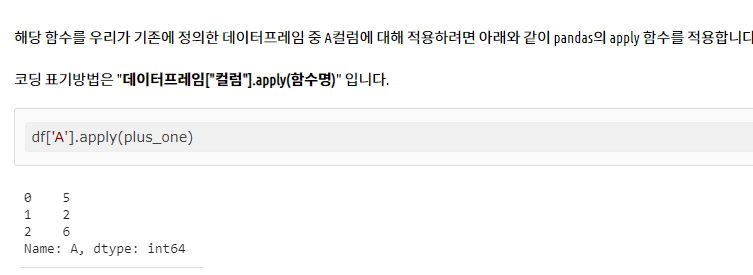

In [30]:
# def fn(a):
#     return 10 * a

# lst = [1, 2, 3, 4]
# ans = []

# for i in lst:
#     x = fn(i)
#     ans.append(x)
# print(ans)

In [31]:
# for i in cng:
#     x = onlyStr(i)
#     all_data['ADDRESS'][i] = x

In [32]:
cng

0                  CrumlinWay
1        SissinghurstCrescent
2                   TeesCourt
3              BrenthamStreet
4              CorkhillStreet
                 ...         
33651           DanehillPlace
33652            HesterStreet
33653              HaleStreet
33654           BushlandsRoad
33655               MarshRoad
Name: ADDRESS, Length: 33656, dtype: object

In [33]:
all_data['ADDRESS'] = cng

In [34]:
all_data

,ADDRESS,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,CrumlinWay,Ridgewood,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,SissinghurstCrescent,Landsdale,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,140.0
2,TeesCourt,Mindarie,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,BrenthamStreet,Mount Hawthorn,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,CorkhillStreet,North Fremantle,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,DanehillPlace,Balga,3,1,2.0,801,108,1996.0,10800,Warwick Station,3900,04-2018\r,6061,-31.857800,115.834370,BALGA SENIOR HIGH SCHOOL,1.352896,140.0
33652,HesterStreet,Langford,4,2,2.0,530,158,1998.0,13100,Thornlie Station,854,11-2018\r,6147,-32.039400,115.951670,COMMUNICARE ACADEMY,1.526169,140.0
33653,HaleStreet,Watermans Bay,3,2,2.0,1072,148,1950.0,14700,Warwick Station,3800,02-2015\r,6020,-31.852980,115.757010,CARINE SENIOR HIGH SCHOOL,1.779797,47.0
33654,BushlandsRoad,Hovea,5,3,2.0,19996,396,1990.0,24900,Midland Station,10200,09-2012\r,6071,-31.878930,116.107640,HELENA COLLEGE,3.523922,78.0


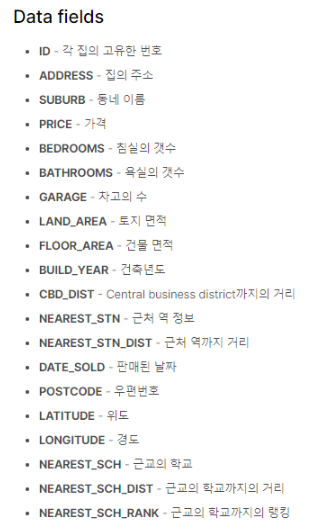

In [35]:
from sklearn.preprocessing import LabelEncoder
cols = ('ADDRESS', 'SUBURB', 'BUILD_YEAR', 'POSTCODE', 'NEAREST_SCH')

for i in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[i].values)) 
    all_data[i] = lbl.transform(list(all_data[i].values))
    
format(all_data.shape)

'(33656, 18)'

In [36]:
all_data

,ADDRESS,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,4754,244,5,2,4.0,674,266,113,35500,Butler Station,3000,09-2015\r,26,-31.656206,115.720566,64,1.079230,120.0
1,12135,168,5,4,2.0,540,301,120,16900,Whitfords Station,8100,07-2018\r,49,-31.800802,115.867675,82,0.667585,140.0
2,12764,196,4,2,2.0,781,220,98,33500,Clarkson Station,3500,02-2020\r,26,-31.682040,115.702600,96,0.650761,111.0
3,3211,201,2,1,2.0,425,185,45,3500,Leederville Station,1500,07-2020\r,12,-31.926046,115.838181,5,0.484465,106.0
4,4581,220,3,2,2.0,546,186,110,12900,North Fremantle Station,800,10-2017\r,95,-32.032079,115.759626,66,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,4945,16,3,1,2.0,801,108,102,10800,Warwick Station,3900,04-2018\r,45,-31.857800,115.834370,12,1.352896,140.0
33652,7109,169,4,2,2.0,530,158,104,13100,Thornlie Station,854,11-2018\r,83,-32.039400,115.951670,33,1.526169,140.0
33653,6791,296,3,2,2.0,1072,148,56,14700,Warwick Station,3800,02-2015\r,16,-31.852980,115.757010,22,1.779797,47.0
33654,3466,136,5,3,2.0,19996,396,96,24900,Midland Station,10200,09-2012\r,53,-31.878930,116.107640,58,3.523922,78.0


In [37]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

(33656, 434)


In [38]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [39]:
# Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df.values)
    rmse = np.sqrt(-cross_val_score(model, train_df.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return (rmse)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(train_df , price, random_state=0, test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression
model_ndf = LinearRegression().fit(x_train, y_train)

In [46]:
model_ndf.score(x_train, y_train)

0.731794946226819

In [47]:
test_df

,ADDRESS,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,...,DATE_SOLD_12-2011\r,DATE_SOLD_12-2012\r,DATE_SOLD_12-2013\r,DATE_SOLD_12-2014\r,DATE_SOLD_12-2015\r,DATE_SOLD_12-2016\r,DATE_SOLD_12-2017\r,DATE_SOLD_12-2018\r,DATE_SOLD_12-2019\r,DATE_SOLD_12-2020\r
18510,6923,208,3,2,3.0,2199,159,56,29600,15600,...,0,0,0,0,0,0,0,0,0,0
18511,8090,251,4,3,2.0,509,341,107,8200,2000,...,0,0,0,0,0,0,0,0,0,0
18512,4475,40,4,3,2.0,725,251,88,10500,2700,...,0,0,0,0,0,0,0,0,0,0
18513,13020,261,3,2,2.0,401,169,115,24100,3500,...,0,0,0,0,0,0,0,0,0,0
18514,1992,293,3,1,1.0,474,107,99,43600,1100,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,4945,16,3,1,2.0,801,108,102,10800,3900,...,0,0,0,0,0,0,0,0,0,0
33652,7109,169,4,2,2.0,530,158,104,13100,854,...,0,0,0,0,0,0,0,0,0,0
33653,6791,296,3,2,2.0,1072,148,56,14700,3800,...,0,0,0,0,0,0,0,0,0,0
33654,3466,136,5,3,2.0,19996,396,96,24900,10200,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y_train

array([12.20607765, 13.27936884, 13.26905948, ..., 12.79386209,
       12.82126099, 13.84020415])

In [50]:
model_test_df = model_ndf.predict(test_df)

In [59]:
y_pred=np.expm1(pd.DataFrame(model_test_df))

In [60]:
# def rmsle(y, y_pred):
#     return np.sqrt(mean_squared_error(y, y_pred))

In [61]:
y_pred.to_csv('128트.csv')

In [ ]:
train_df['PRICE']

In [ ]:
all_data['NEAREST_SCH']

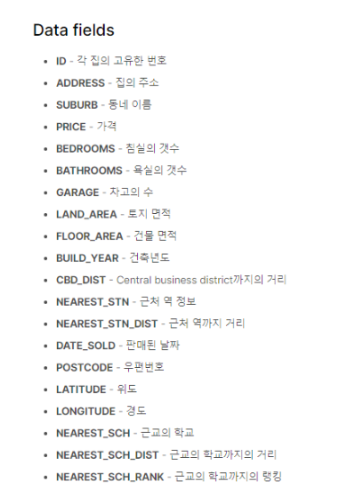

In [ ]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df.values)
    rmse = np.sqrt(-cross_val_score(model, train_df.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return (rmse)